In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## 1. We shall use the same dataset used in previous assignment - digits. Make a 80-20 train/test split.
[Hint: Explore datasets module from scikit learn]

In [55]:
from sklearn.datasets import load_digits

In [56]:
dat = load_digits()

In [57]:
dat["data"].shape

(1797, 64)

In [58]:
dat["target"]

array([0, 1, 2, ..., 8, 9, 8])

In [59]:
dat

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [60]:
dat["images"]

array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ..., 15.,  5.,  0.],
        [ 0.,  3., 15., ..., 11.,  8.,  0.],
        ...,
        [ 0.,  4., 11., ..., 12.,  7.,  0.],
        [ 0.,  2., 14., ..., 12.,  0.,  0.],
        [ 0.,  0.,  6., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
        [ 0.,  0.,  0., ...,  9.,  0.,  0.],
        [ 0.,  0.,  3., ...,  6.,  0.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.]],

       [[ 0.,  0.,  0., ..., 12.,  0.,  0.],
        [ 0.,  0.,  3., ..., 14.,  0.,  0.],
        [ 0.,  0.,  8., ..., 16.,  0.,  0.],
        ...,
        [ 0.,  9., 16., ...,  0.,  0.,  0.],
        [ 0.,  3., 13., ..., 11.,  5.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.]],

       ...,

       [[ 0.,  0.,  1., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ...,  2.,  1.,  0.],
        [ 0.,  0., 16., ..., 16.,  5.,  0.

In [61]:
len(dat.feature_names)

64

In [62]:
X = pd.DataFrame(dat["data"], columns=dat["feature_names"])

In [135]:
y = pd.Series(dat["target"])

In [64]:
y.value_counts()

3    183
1    182
5    182
4    181
6    181
9    180
7    179
0    178
2    177
8    174
dtype: int64

In [106]:
from sklearn.model_selection import train_test_split

In [107]:
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2)

## Using Principle Component Analysis(PCA) first for benchmark

In [81]:
from sklearn.decomposition import PCA

In [86]:
pcaModel = PCA(n_components=29)

In [87]:
tranformed_X= pcaModel.fit_transform(X)

In [88]:
tranformed_X[0]

array([-1.25946643, 21.27488343, -9.46305467, 13.01418916, -7.12882532,
       -7.44065524,  3.25283703,  2.55348892, -0.58185434,  3.62568938,
        2.58597881,  1.55166101,  0.85451425, -3.33854653,  5.90698244,
        2.74359368,  0.42001263, -0.89861884,  0.70559495, -3.46514085,
        2.68512812,  1.01735938,  2.00396407,  1.29969027,  1.17298358,
        2.28441674,  3.66302799, -0.93602816, -1.11524244])

In [89]:
pcaModel.explained_variance_ratio_*100

array([14.89059358, 13.61877124, 11.79459376,  8.40997942,  5.78241466,
        4.91691032,  4.31598701,  3.66137258,  3.3532481 ,  3.07880621,
        2.37234084,  2.27269657,  1.82186331,  1.77385494,  1.46710108,
        1.40971557,  1.31858895,  1.24813776,  1.01771757,  0.90561713,
        0.88953789,  0.79711879,  0.76748697,  0.72290022,  0.69588623,
        0.59607242,  0.57559306,  0.515108  ,  0.48946845])

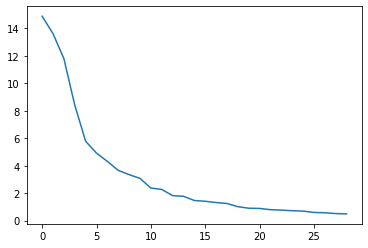

In [90]:
plt.plot(pcaModel.explained_variance_ratio_*100)

In [91]:
acc = []
temp = 0
for each in (pcaModel.explained_variance_ratio_*100):
    temp = each + temp
    acc.append(temp)

In [92]:
temp

95.47948264204203

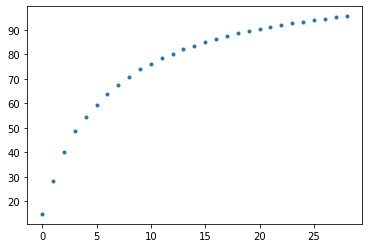

In [93]:
plt.plot(acc, '.')

In [94]:
from sklearn.linear_model import LogisticRegression

In [95]:
train_transformed_x, test_transformed_x, train_y, test_y = train_test_split(tranformed_X, y, test_size=0.2)
lrModel = LogisticRegression(max_iter = 10000)
lrModel.fit(train_transformed_x, train_y)
predict_y = lrModel.predict(test_transformed_x)

In [96]:
lrModel.score(test_transformed_x, test_y)*100

94.72222222222221

In [97]:
from sklearn.metrics import confusion_matrix

In [98]:
confusion_matrix(test_y, predict_y)

array([[28,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 32,  0,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 38,  2,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 29,  0,  1,  0,  1,  0,  0],
       [ 0,  1,  0,  0, 33,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 33,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 31,  0,  1,  0],
       [ 0,  0,  0,  1,  0,  0,  0, 38,  0,  1],
       [ 0,  2,  0,  1,  0,  1,  0,  0, 43,  0],
       [ 0,  0,  0,  1,  0,  1,  0,  1,  2, 36]], dtype=int64)

## 2. Using scikit learn perform a LDA on the dataset. Find out the number of components in the projected subspace.
[Hint: Refer to discriminant analysis module of scikit learn]

In [112]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [113]:
ldaModel = LinearDiscriminantAnalysis()

In [139]:
out = ldaModel.fit_transform(train_x, train_y)

In [140]:
ldaModel.explained_variance_ratio_*100

array([29.35807554, 18.02809978, 16.9521553 , 11.80471231,  8.13395572,
        6.64032542,  4.10854488,  3.03833988,  1.93579118])

In [143]:
predicted_y_lds = ldaModel.predict(test_x)

In [144]:
confusion_matrix(test_y, predicted_y_lds)

array([[34,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1, 33,  0,  0,  0,  0,  0,  0,  1,  2],
       [ 0,  0, 29,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 41,  0,  1,  0,  0,  1,  0],
       [ 0,  0,  0,  0, 25,  0,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0, 27,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 49,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 34,  0,  0],
       [ 0,  2,  0,  0,  0,  0,  0,  0, 37,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 40]], dtype=int64)

In [146]:
ldaModel.score(test_x, test_y)*100

96.94444444444444

## LDA is little bitter than PCA